In [ ]:
# Importar las bibliotecas necesarias
# NumPy para operaciones numéricas eficientes
import numpy as np
# Pandas para el manejo de datos estructurados
import pandas as pd
# Matplotlib para visualización de gráficos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Biblioteca aleatoria para generar números aleatorios
import random
# Módulo de sistema operativo para interactuar con el sistema de archivos
import os
# TensorFlow para el aprendizaje profundo
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# Keras para el procesamiento de imágenes
from keras.preprocessing import image
# Capas de Keras para la construcción del modelo
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
# Capas adicionales de Keras para mejorar el rendimiento del modelo
from tensorflow.keras.layers import Dropout, BatchNormalization
# TensorFlow Hub para el uso de modelos pre-entrenados
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Utiliza la función os.walk() para recorrer los archivos en el directorio y subdirectorios especificados
# 'dirname' es el nombre del directorio actual, '_' son las carpetas que no se van a utilizar y
#'filenames' son los nombres de archivo en la carpeta actual
for dirname, _, filenames in os.walk('C:\\Users\\lrios\\Desktop\\reserva\\data'):
    # Itera sobre cada nombre de archivo en la lista 'filenames' de la carpeta actual
    for filename in filenames:
        # Imprime la ruta de acceso completa del archivo actual
        print(os.path.join(dirname, filename))

C:\Users\lrios\Desktop\reserva\data\EfficientNetB0-10-(224 X 224)-100.00.h5
C:\Users\lrios\Desktop\reserva\data\MobileNetV3 small-10-(224 X 224)-95.96.h5
C:\Users\lrios\Desktop\reserva\data\WILDCATS.CSV
C:\Users\lrios\Desktop\reserva\data\test\AFRICAN LEOPARD\1.jpg
C:\Users\lrios\Desktop\reserva\data\test\AFRICAN LEOPARD\2.jpg
C:\Users\lrios\Desktop\reserva\data\test\AFRICAN LEOPARD\3.jpg
C:\Users\lrios\Desktop\reserva\data\test\AFRICAN LEOPARD\4.jpg
C:\Users\lrios\Desktop\reserva\data\test\AFRICAN LEOPARD\5.jpg
C:\Users\lrios\Desktop\reserva\data\test\CARACAL\1.jpg
C:\Users\lrios\Desktop\reserva\data\test\CARACAL\2.jpg
C:\Users\lrios\Desktop\reserva\data\test\CARACAL\3.jpg
C:\Users\lrios\Desktop\reserva\data\test\CARACAL\4.jpg
C:\Users\lrios\Desktop\reserva\data\test\CARACAL\5.jpg
C:\Users\lrios\Desktop\reserva\data\test\CHEETAH\1.jpg
C:\Users\lrios\Desktop\reserva\data\test\CHEETAH\2.jpg
C:\Users\lrios\Desktop\reserva\data\test\CHEETAH\3.jpg
C:\Users\lrios\Desktop\reserva\data\test\C

In [ ]:
# Lee la lista de nombres de archivo en la carpeta especificada
labels = os.listdir("C:\\Users\\lrios\\Desktop\\reserva\\data\\train")
labels

['AFRICAN LEOPARD',
 'CARACAL',
 'CHEETAH',
 'CLOUDED LEOPARD',
 'JAGUAR',
 'LIONS',
 'OCELOT',
 'PUMA',
 'SNOW LEOPARD',
 'TIGER']

In [ ]:
# Calcula la cantidad de categorías utilizando la longitud de la lista de etiquetas
numClass = len(labels)
numClass

10

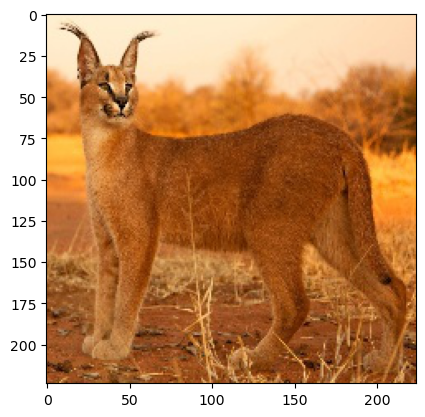

In [ ]:
img = mpimg.imread("C:\\Users\\lrios\\Desktop\\reserva\\data\\train\\CARACAL\\009.jpg")
plt.imshow(img)

In [ ]:
def view_random_image(target_dir, target_class):

    # Combina el directorio raíz con el nombre de la carpeta especificada
    target_folder = target_dir+target_class
    # Selecciona una imagen aleatoria de la carpeta especificada
    random_image = random.sample(os.listdir(target_folder), 1)
    # Selecciona una imagen aleatoria de la carpeta especificada
    img = mpimg.imread(target_folder + "/" + random_image[0])
    # Muestra la imagen y agrega un título que es igual al nombre de la carpeta especificada
    plt.imshow(img)
    plt.title(target_class)
    # Oculta los ejes de la imagen
    plt.axis("off");
    # Imprime la forma de la imagen
    print(f"Image shape: {img.shape}")
    # Imprime la forma de la imagen
    return img

Esto son las categorias que podes elegir ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']
Elige una categoria: clouded leopard
 
Image shape: (224, 224, 3)


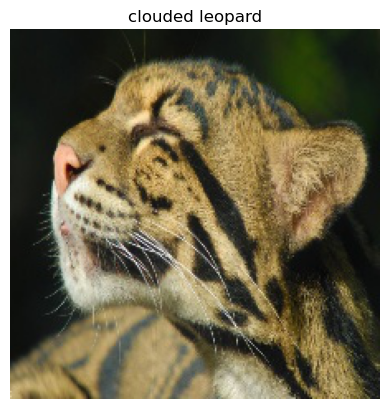

In [ ]:
# Imprime un mensaje que muestra las categorías que el usuario puede elegir
print(f"Esto son las categorias que podes elegir {labels}")
# Solicita al usuario que ingrese una categoría para mostrar una imagen aleatoria
categoria = input("Elige una categoria: ")
print(" ")
# Llama a la función 'view_random_image' y le pasa el directorio raíz y la categoría elegida por el usuario como argumentos.
# También establece el parámetro 'target_dir' en la ruta de acceso del directorio de entrenamiento.
img = view_random_image(target_dir="C:\\Users\\lrios\\Desktop\\reserva\\data\\train\\",
                        target_class = categoria ) #="TIGER"

In [ ]:
# Define el path donde esta el train
train_dir = "C:\\Users\\lrios\\Desktop\\reserva\\data\\train"
# Define el path donde esta el test
test_dir = "C:\\Users\\lrios\\Desktop\\reserva\\data\\test"

### Modelo sin aumentacion de datos.

In [ ]:
# genera una semilla aleatoria para poder replicar la prueba
tf.random.set_seed(42)

generator = ImageDataGenerator(rescale = 1./255.)

In [ ]:
train_data = generator.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data = generator.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
cats_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(numClass, activation="softmax")
])

In [ ]:
cats_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
cats_model_history = cats_model.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
74/74 [==============================] - 371s 5s/step - loss: 2.3204 - accuracy: 0.1479 - val_loss: 2.1048 - val_accuracy: 0.1200
Epoch 2/50
74/74 [==============================] - 400s 5s/step - loss: 1.8803 - accuracy: 0.3023 - val_loss: 1.6941 - val_accuracy: 0.3200
Epoch 3/50
74/74 [==============================] - 411s 5s/step - loss: 1.3197 - accuracy: 0.5135 - val_loss: 1.4420 - val_accuracy: 0.4800
Epoch 4/50
74/74 [==============================] - 400s 5s/step - loss: 0.6743 - accuracy: 0.7738 - val_loss: 1.7067 - val_accuracy: 0.5000
Epoch 5/50
74/74 [==============================] - 377s 5s/step - loss: 0.2040 - accuracy: 0.9401 - val_loss: 2.3054 - val_accuracy: 0.4000
Epoch 6/50
74/74 [==============================] - 351s 5s/step - loss: 0.0740 - accuracy: 0.9803 - val_loss: 2.8292 - val_accuracy: 0.4400
Epoch 7/50
74/74 [==============================] - 317s 4s/step - loss: 0.0225 - accuracy: 0.9953 - val_loss: 3.2984 - val_accuracy: 0.3400
Epoch 8/50
74

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [ ]:
resnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(numClass, activation='softmax', name='output_layer') # create our own output layer
  ])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_model_history = resnet_model.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/10
74/74 [==============================] - 185s 2s/step - loss: 0.4833 - accuracy: 0.8487 - val_loss: 0.1089 - val_accuracy: 0.9600
Epoch 2/10
74/74 [==============================] - 172s 2s/step - loss: 0.2088 - accuracy: 0.9367 - val_loss: 0.1283 - val_accuracy: 0.9600
Epoch 3/10
74/74 [==============================] - 182s 2s/step - loss: 0.1928 - accuracy: 0.9380 - val_loss: 0.0631 - val_accuracy: 0.9800
Epoch 4/10
74/74 [==============================] - 183s 2s/step - loss: 0.1398 - accuracy: 0.9530 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 194s 3s/step - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 184s 2s/step - loss: 0.1184 - accuracy: 0.9619 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 189s 3s/step - loss: 0.0965 - accuracy: 0.9705 - val_loss: 0.2082 - val_accuracy: 0.9400
Epoch 8/10
74

In [ ]:
resnet_model.evaluate(test_data)

2/2 [==============================] - 4s 1s/step - loss: 0.0881 - accuracy: 0.9600


[0.08809017390012741, 0.9599999785423279]

### Modelo con aumentacion de datos.

In [ ]:
generatorTotal = ImageDataGenerator(rescale = 1./255.,
                              horizontal_flip=True,
                              vertical_flip=True,
                              zoom_range=0.05,
                              rotation_range=25)

In [ ]:
train_dataTotal = generatorTotal.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_dataTotal = generatorTotal.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
cats_modelTotal = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(numClass, activation="softmax")
])

In [ ]:
cats_modelTotal.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
cats_model_historyTotal = cats_modelTotal.fit(train_dataTotal,
                        epochs=50,
                        steps_per_epoch=len(train_dataTotal),
                        validation_data=test_dataTotal)

Epoch 1/50
74/74 [==============================] - 366s 5s/step - loss: 2.3575 - accuracy: 0.1107 - val_loss: 2.2474 - val_accuracy: 0.1200
Epoch 2/50
74/74 [==============================] - 320s 4s/step - loss: 2.0704 - accuracy: 0.2125 - val_loss: 1.9278 - val_accuracy: 0.2000
Epoch 3/50
74/74 [==============================] - 315s 4s/step - loss: 1.8652 - accuracy: 0.2890 - val_loss: 1.8356 - val_accuracy: 0.2400
Epoch 4/50
74/74 [==============================] - 321s 4s/step - loss: 1.6258 - accuracy: 0.3690 - val_loss: 1.7702 - val_accuracy: 0.3200
Epoch 5/50
74/74 [==============================] - 317s 4s/step - loss: 1.5315 - accuracy: 0.3886 - val_loss: 1.8535 - val_accuracy: 0.2000
Epoch 6/50
74/74 [==============================] - 317s 4s/step - loss: 1.4808 - accuracy: 0.4190 - val_loss: 1.6099 - val_accuracy: 0.3200
Epoch 7/50
74/74 [==============================] - 317s 4s/step - loss: 1.3837 - accuracy: 0.4562 - val_loss: 1.4336 - val_accuracy: 0.4000
Epoch 8/50
74

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
feature_extractor_layerCon = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [ ]:
resnet_modelCon = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(numClass, activation='softmax', name='output_layer') # create our own output layer
  ])

In [ ]:
resnet_modelCon.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_model_historyCon = resnet_modelCon.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/10
74/74 [==============================] - 180s 2s/step - loss: 0.8105 - accuracy: 0.7362 - val_loss: 0.6125 - val_accuracy: 0.7600
Epoch 2/10
74/74 [==============================] - 193s 3s/step - loss: 0.4285 - accuracy: 0.8482 - val_loss: 0.3499 - val_accuracy: 0.9200
Epoch 3/10
74/74 [==============================] - 173s 2s/step - loss: 0.3902 - accuracy: 0.8670 - val_loss: 0.2810 - val_accuracy: 0.8800
Epoch 4/10
74/74 [==============================] - 187s 3s/step - loss: 0.3673 - accuracy: 0.8705 - val_loss: 0.1856 - val_accuracy: 0.9200
Epoch 5/10
74/74 [==============================] - 172s 2s/step - loss: 0.3453 - accuracy: 0.8773 - val_loss: 0.2926 - val_accuracy: 0.8800
Epoch 6/10
74/74 [==============================] - 172s 2s/step - loss: 0.2853 - accuracy: 0.9051 - val_loss: 0.1626 - val_accuracy: 0.9000
Epoch 7/10
74/74 [==============================] - 169s 2s/step - loss: 0.2642 - accuracy: 0.9034 - val_loss: 0.1332 - val_accuracy: 0.9600
Epoch 8/10
74

### Comparaciones de resultados

In [ ]:
dfSin = pd.DataFrame(resnet_model_history.history)
dfSin = dfSin.rename(columns= {'loss':'lossSin', 'accuracy':'acuracySin', 'val_loss':'valLossSin','val_accuracy':'valAccSin'})

<AxesSubplot:>

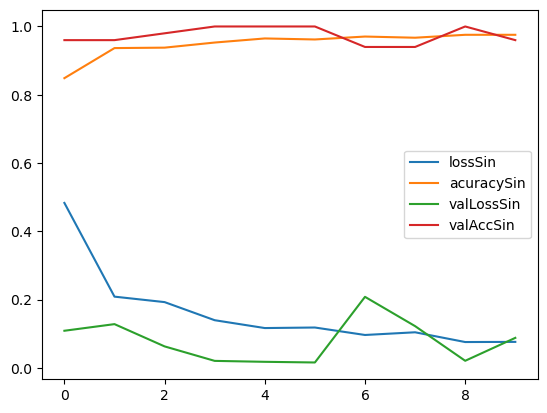

In [ ]:
graficoSin = pd.DataFrame(dfSin).plot()
graficoSin

In [ ]:
dfSin.to_csv('dfSin.csv', index=False)

In [ ]:
dfCon = pd.DataFrame(resnet_model_historyCon.history)
dfCon = dfCon.rename(columns= {'loss':'lossCon', 'accuracy':'acuracyCon', 'val_loss':'valLossCon','val_accuracy':'valAccCon'})
dfCon

,lossCon,acuracyCon,valLossCon,valAccCon
0,0.810465,0.736212,0.612538,0.76
1,0.428545,0.848226,0.349944,0.92
2,0.390172,0.867037,0.281040,0.88
3,0.367332,0.870457,0.185589,0.92
4,0.345316,0.877298,0.292622,0.88
5,0.285343,0.905088,0.162570,0.90
6,0.264229,0.903378,0.133201,0.96
7,0.275105,0.904233,0.161566,0.94
8,0.253991,0.918769,0.157953,0.94
9,0.242113,0.916203,0.070407,0.98


<AxesSubplot:>

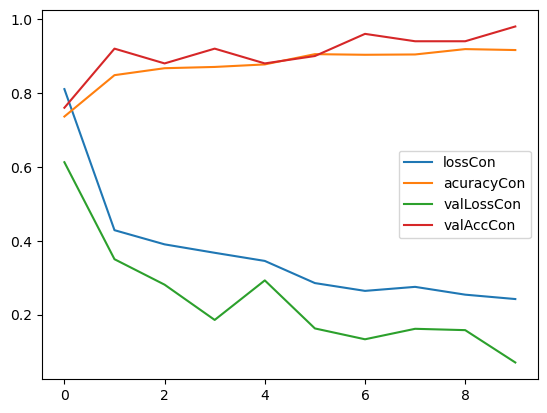

In [ ]:
graficoCon = pd.DataFrame(dfCon).plot()
graficoCon

In [ ]:
dfCon.to_csv('dfCon.csv', index=False)

<AxesSubplot:>

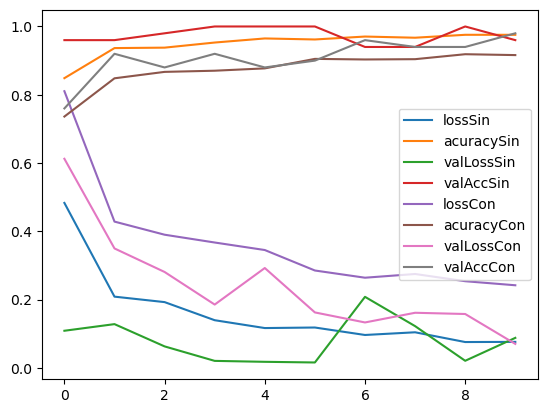

In [ ]:
dfTotal = pd.DataFrame(dfSin)
dfTotal.to_csv('dfTotal.csv', index=False)
dfTotal['lossCon'] = dfCon['lossCon']
dfTotal['acuracyCon'] = dfCon['acuracyCon']
dfTotal['valLossCon'] = dfCon['valLossCon']
dfTotal['valAccCon'] = dfCon['valAccCon']
dfTotal.plot()

In [ ]:
df_Total = df_Total.drop(columns=['lossSin','valLossSin','lossCon','valLossCon'])
df_Total

In [ ]:
df_Total.plot()